In [1]:
import pandas as pd

# Data Preparation pada Data Training creditapproval

In [2]:
data_train = pd.read_excel(r'E:\DMRapid\dataset\creditapproval-training.xls')
data_train.head()

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,37.0,649926.0,6,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,x4,P,2.0,459168.0,12,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,x5,P,34.0,3055499.0,8,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            766 non-null    object 
 1   jenis_kelamin           766 non-null    object 
 2   umur                    765 non-null    float64
 3   jml_pinjaman            766 non-null    float64
 4   jkw                     766 non-null    int64  
 5   jml_angsuran_per_bulan  766 non-null    float64
 6   type_pinjaman           766 non-null    int64  
 7   jenis_pinjaman          766 non-null    int64  
 8   bi_sektor_ekonomi       765 non-null    float64
 9   col                     766 non-null    int64  
 10  bi_golongan_debitur     766 non-null    int64  
 11  bi_gol_penjamin         766 non-null    int64  
 12  saldo_nominatif         766 non-null    float64
 13  tunggakan_pokok         766 non-null    float64
 14  tunggakan_bunga         766 non-null    fl

In [4]:
X = data_train['jenis_kelamin'].values.reshape(-1, 1)
X

array([['P'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['P'],
       ['P'],
       ['L'],
       ['L'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
       ['P'],
       ['P'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
      

In [5]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
X = onehot_encoder.fit_transform(X).toarray()
X

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [6]:
df_onehot = pd.DataFrame(X, columns=[str(i) for i in range(X.shape[1])])
df_onehot

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
761,1.0,0.0
762,0.0,1.0
763,1.0,0.0
764,0.0,1.0


In [7]:
data_train = pd.concat([df_onehot, data_train], axis=1)
data_train

,0,1,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,0.0,1.0,x1,P,40.0,345000.0,1,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,1.0,0.0,x2,L,31.0,350000.0,7,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,1.0,0.0,x3,L,37.0,649926.0,6,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,0.0,1.0,x4,P,2.0,459168.0,12,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,0.0,1.0,x5,P,34.0,3055499.0,8,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,1.0,0.0,x762,L,38.0,1000000.0,16,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,0.0,1.0,x763,P,36.0,1000000.0,12,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,1.0,0.0,x764,L,28.0,2000000.0,10,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,0.0,1.0,x765,P,31.0,1312500.0,7,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [8]:
data_train = data_train.drop(columns='jenis_kelamin')
data_train

,0,1,nama_nasabah,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,0.0,1.0,x1,40.0,345000.0,1,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,1.0,0.0,x2,31.0,350000.0,7,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,1.0,0.0,x3,37.0,649926.0,6,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,0.0,1.0,x4,2.0,459168.0,12,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,0.0,1.0,x5,34.0,3055499.0,8,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,1.0,0.0,x762,38.0,1000000.0,16,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,0.0,1.0,x763,36.0,1000000.0,12,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,1.0,0.0,x764,28.0,2000000.0,10,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,0.0,1.0,x765,31.0,1312500.0,7,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [9]:
data_train = data_train.drop(columns='nama_nasabah')
data_train

,0,1,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,0.0,1.0,40.0,345000.0,1,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,1.0,0.0,31.0,350000.0,7,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,1.0,0.0,37.0,649926.0,6,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,0.0,1.0,2.0,459168.0,12,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,0.0,1.0,34.0,3055499.0,8,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,1.0,0.0,38.0,1000000.0,16,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,0.0,1.0,36.0,1000000.0,12,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,1.0,0.0,28.0,2000000.0,10,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,0.0,1.0,31.0,1312500.0,7,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [10]:
data_train.isnull().sum()

0                         0
1                         0
umur                      1
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

# Deteksi Outlier pada data train di kolom umur

<AxesSubplot:>

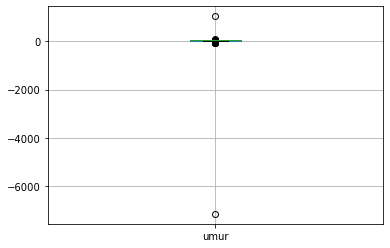

In [11]:
import matplotlib.pyplot as plt

data_train.boxplot(column='umur')

# Menghapus outlier pada data train kolom umur

In [12]:
Q1 = data_train['umur'].quantile(0.25)
Q3 = data_train['umur'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
data_train = data_train[~((data_train['umur'] < (Q1 - 1.5 * IQR)) | (data_train['umur'] > (Q3 + 1.5 * IQR)))]

<AxesSubplot:>

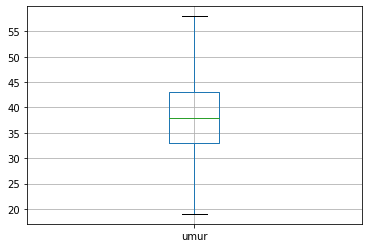

In [14]:
data_train.boxplot(column='umur')

In [15]:
data_train.shape

(724, 16)

In [16]:
data_train.isnull().sum()

0                         0
1                         0
umur                      1
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

# Mengisi missing value pada kolom umur dengan rata-rata

In [17]:
data_train['umur'] = data_train['umur'].fillna(data_train['umur'].mean())

C:\Users\farha\AppData\Local\Temp/ipykernel_9548/3242163489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['umur'] = data_train['umur'].fillna(data_train['umur'].mean())


In [18]:
data_train.shape

(724, 16)

In [19]:
data_train.isnull().sum()

0                         0
1                         0
umur                      0
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

# Deteksi outlier pada data train di kolom bi_sektor_ekonomi

<AxesSubplot:>

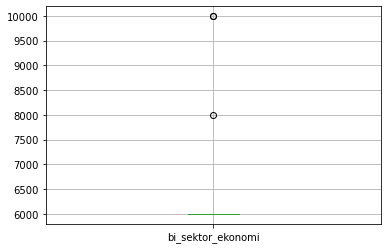

In [20]:
data_train.boxplot(column='bi_sektor_ekonomi')

# Menghapus outlier pada data train di kolom bi_sektor_ekonomi

In [21]:
Q1 = data_train['bi_sektor_ekonomi'].quantile(0.25)
Q3 = data_train['bi_sektor_ekonomi'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.0

In [22]:
data_train = data_train[~((data_train['bi_sektor_ekonomi'] < (Q1 - 1.5 * IQR)) | (data_train['bi_sektor_ekonomi'] > (Q3 + 1.5 * IQR)))]
data_train

,0,1,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,0.0,1.0,40.0,345000.0,1,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,1.0,0.0,31.0,350000.0,7,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,1.0,0.0,37.0,649926.0,6,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
4,0.0,1.0,34.0,3055499.0,8,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET
5,1.0,0.0,49.0,2000000.0,16,0.00,100,301,6000.0,1,874,875,-85000.0,0.00,0.0,LANCAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,1.0,0.0,38.0,1000000.0,16,70000.00,100,301,6000.0,2,874,0,812500.0,812500.00,97500.0,MACET
762,0.0,1.0,36.0,1000000.0,12,90833.37,100,301,6000.0,2,874,0,429000.0,429000.00,45000.0,MACET
763,1.0,0.0,28.0,2000000.0,10,260000.00,100,301,6000.0,2,874,0,600000.0,600000.00,180000.0,MACET
764,0.0,1.0,31.0,1312500.0,7,198750.00,100,301,6000.0,2,874,0,1312500.0,1312500.00,78750.0,MACET


In [23]:
data_train['bi_sektor_ekonomi'] = data_train['bi_sektor_ekonomi'].fillna(data_train['bi_sektor_ekonomi'].mean())

In [24]:
data_train.isnull().sum()

0                         0
1                         0
umur                      0
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         0
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64

# Data Preparation pada Data Testing creditapproval

In [25]:
data_test = pd.read_excel(r'E:\DMRapid\dataset\creditapproval-testing.xls')
data_test

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x767,P,36.0,439000.01,6.0,95300.01,100.0,301.0,6000.0,2.0,874.0,0.0,345250.01,345250.01,31250.00,MACET
1,x768,P,42.0,783333.34,9.0,95370.37,100.0,301.0,6000.0,2.0,874.0,0.0,691666.34,691666.34,66664.03,MACET
2,x769,P,34.0,5000000.00,24.0,245833.41,100.0,301.0,6000.0,2.0,874.0,0.0,3958333.35,3958333.35,749999.99,MACET
3,x770,L,32.0,1000000.00,12.0,90833.37,100.0,301.0,6000.0,2.0,874.0,0.0,60000.01,60000.01,7500.00,MACET
4,x771,P,34.0,2000000.00,12.0,181666.74,100.0,301.0,6000.0,2.0,874.0,0.0,1100000.00,1100000.00,90000.00,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [26]:
X = data_test['jenis_kelamin'].values.reshape(-1, 1)
X

array([['P'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['L'],
       ['P'],
       ['L'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['P'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['L'],
       ['L'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
       ['P'],
       ['L'],
       ['P'],
       ['P'],
      

In [27]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
X = onehot_encoder.fit_transform(X).toarray()
X

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [28]:
df_onehot = pd.DataFrame(X, columns=[str(i) for i in range(X.shape[1])])
df_onehot

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
147,0.0,0.0,1.0
148,0.0,0.0,1.0
149,0.0,0.0,1.0
150,0.0,0.0,1.0


In [29]:
data_test = pd.concat([df_onehot, data_test], axis=1)
data_test

,0,1,2,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,0.0,1.0,0.0,x767,P,36.0,439000.01,6.0,95300.01,100.0,301.0,6000.0,2.0,874.0,0.0,345250.01,345250.01,31250.00,MACET
1,0.0,1.0,0.0,x768,P,42.0,783333.34,9.0,95370.37,100.0,301.0,6000.0,2.0,874.0,0.0,691666.34,691666.34,66664.03,MACET
2,0.0,1.0,0.0,x769,P,34.0,5000000.00,24.0,245833.41,100.0,301.0,6000.0,2.0,874.0,0.0,3958333.35,3958333.35,749999.99,MACET
3,1.0,0.0,0.0,x770,L,32.0,1000000.00,12.0,90833.37,100.0,301.0,6000.0,2.0,874.0,0.0,60000.01,60000.01,7500.00,MACET
4,0.0,1.0,0.0,x771,P,34.0,2000000.00,12.0,181666.74,100.0,301.0,6000.0,2.0,874.0,0.0,1100000.00,1100000.00,90000.00,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
data_test = data_test.drop(columns='nama_nasabah')

In [31]:
data_test = data_test.drop(columns='jenis_kelamin')

In [32]:
data_test = data_test.drop(columns='2')

In [33]:
data_test

,0,1,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,0.0,1.0,36.0,439000.01,6.0,95300.01,100.0,301.0,6000.0,2.0,874.0,0.0,345250.01,345250.01,31250.00,MACET
1,0.0,1.0,42.0,783333.34,9.0,95370.37,100.0,301.0,6000.0,2.0,874.0,0.0,691666.34,691666.34,66664.03,MACET
2,0.0,1.0,34.0,5000000.00,24.0,245833.41,100.0,301.0,6000.0,2.0,874.0,0.0,3958333.35,3958333.35,749999.99,MACET
3,1.0,0.0,32.0,1000000.00,12.0,90833.37,100.0,301.0,6000.0,2.0,874.0,0.0,60000.01,60000.01,7500.00,MACET
4,0.0,1.0,34.0,2000000.00,12.0,181666.74,100.0,301.0,6000.0,2.0,874.0,0.0,1100000.00,1100000.00,90000.00,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Menghapus Missing Value pada data testing creditapproval

In [36]:
data_test = data_test.dropna(axis=0, how="any")

In [37]:
data_test

,0,1,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,0.0,1.0,36.0,439000.01,6.0,95300.01,100.0,301.0,6000.0,2.0,874.0,0.0,345250.01,345250.01,31250.00,MACET
1,0.0,1.0,42.0,783333.34,9.0,95370.37,100.0,301.0,6000.0,2.0,874.0,0.0,691666.34,691666.34,66664.03,MACET
2,0.0,1.0,34.0,5000000.00,24.0,245833.41,100.0,301.0,6000.0,2.0,874.0,0.0,3958333.35,3958333.35,749999.99,MACET
3,1.0,0.0,32.0,1000000.00,12.0,90833.37,100.0,301.0,6000.0,2.0,874.0,0.0,60000.01,60000.01,7500.00,MACET
4,0.0,1.0,34.0,2000000.00,12.0,181666.74,100.0,301.0,6000.0,2.0,874.0,0.0,1100000.00,1100000.00,90000.00,MACET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,1.0,22.0,5000000.00,12.0,566666.74,100.0,301.0,6000.0,1.0,874.0,0.0,5000000.00,0.00,0.00,LANCAR
96,0.0,1.0,35.0,1000000.00,60.0,18167.06,100.0,301.0,6000.0,2.0,874.0,0.0,264433.38,264433.38,24000.00,MACET
97,0.0,1.0,29.0,1000000.00,12.0,90761.37,100.0,301.0,6000.0,2.0,874.0,0.0,727189.34,727189.34,59424.00,MACET
98,0.0,1.0,36.0,500000.00,8.0,67452.00,100.0,301.0,6000.0,2.0,874.0,0.0,500000.00,500000.00,39616.00,MACET


In [39]:
X_train = data_train.drop(columns='status kredit')
y_train = data_train['status kredit']
X_test = data_test.drop(columns='status kredit')
y_test = data_test['status kredit']

# Modelling

In [40]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = decision_tree.predict(X_test)

# Evaluation

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      LANCAR       0.89      0.95      0.92        41
       MACET       0.96      0.92      0.94        59

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[39,  2],
       [ 5, 54]], dtype=int64)